In [2]:
from test1 import test2

damn
hell


In [20]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Chapter4_new')
sys.path.insert(0,'/content/drive/MyDrive/Chapter4_new/data')

In [28]:
import get_aia_simu

In [ ]:
aia_adjusted_files = sorted(glob.glob('/content/drive/MyDrive/Chapter4_new/data/AIA/*adjusted.fits'))
aia_adjusted_files
#/content/drive/MyDrive/Chapter4_new/data/AIA/aia_lev1_304a_2011_02_03t00_04_08_12z_image_lev1.fits

In [37]:
aia_adjusted_files = sorted(glob.glob('data/AIA/*adjusted.fits'))

In [31]:
import os
print(os.getcwd())

/content


### change directory  (using cmd)

In [1]:
! pip install sunpy
! pip install astropy

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Chapter4_new')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sunpy.map
import astropy.units as u
import scipy
import matplotlib.pyplot as plt
import json
import numpy as np
import glob
import time
import os
from datetime import datetime
import cupy as cp

from pixel_to_world.my_pixel_to_world import my_pixel_to_world
from calculate_DN import calculate_DN_4096
from gaussian_fit_aia import gaussian_fit_aia
from error_function import error_function

from constant import wavelength_list_aia
from math import pi

# a first compare

## read eve

In [ ]:
eve_data;

NameError: name 'eve_data' is not defined

In [ ]:
with open('mean_dict.json', 'r') as f:
    # Load the JSON data into a Python dictionary
    eve_data = json.load(f)

eve_obs={}
for key, value in eve_data.items():
    eve_obs[int(key)] = float(value)

# # Replace the old dictionary with the new one
eve_obs

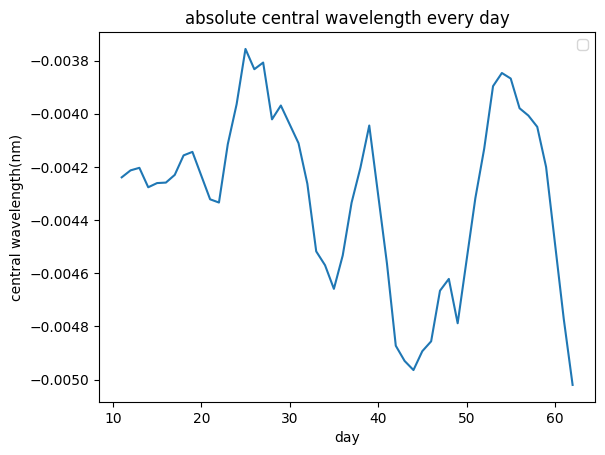

In [9]:
fig,ax=plt.subplots()
ax.plot(eve_obs.keys(),eve_obs.values())
ax.set_title('absolute central wavelength every day')

ax.set_xlabel('day')
ax.set_ylabel('central wavelength(nm)')
ax.legend()

## read aia

In [10]:
aia_adjusted_files=sorted(glob.glob('data/AIA/*adjusted.fits'))
aia_adjusted_maps=sunpy.map.Map(aia_adjusted_files)
irradiance=np.zeros((len(aia_adjusted_maps),len(wavelength_list_aia)))
correction=np.zeros(len(aia_adjusted_maps))

In [11]:
for i in range(len(aia_adjusted_maps)):
    irradiance[i]=calculate_DN_4096(aia_adjusted_maps[i])
    correction[i]=gaussian_fit_aia(wavelength_list_aia,irradiance[i])

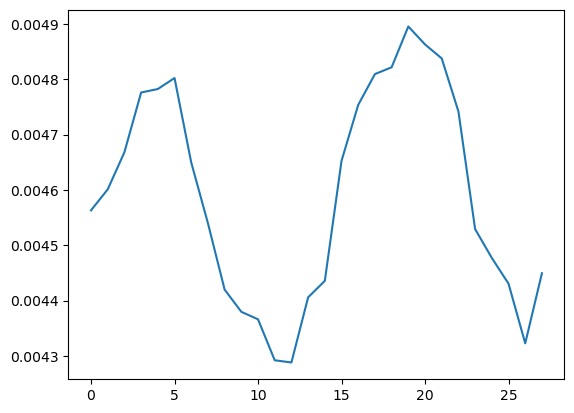

In [ ]:
fig,ax=plt.subplots()
ax.plot(correction)

### extract time from map

In [ ]:
aia_adjusted_maps[0].meta['t_obs']

'2011-02-03T00:04:09.57Z'

In [ ]:
dt = datetime.strptime(aia_adjusted_maps[0].meta['t_obs'], '%Y-%m-%dT%H:%M:%S.%fZ')

# Extract the day of the year from the datetime object
day_of_year = dt.timetuple().tm_yday

In [ ]:
time_list=[]

In [ ]:
for aia_adjusted_map in aia_adjusted_maps:
    dt = datetime.strptime(aia_adjusted_map.meta['t_obs'], '%Y-%m-%dT%H:%M:%S.%fZ')

    # Extract the day of the year from the datetime object
    day_of_year = dt.timetuple().tm_yday
    time_list.append(day_of_year)

In [ ]:
len(time_list)

28

In [ ]:
aia_adjusted_map.meta['t_obs']

'2011-03-02T00:04:09.58Z'

In [ ]:
len(correction)

28

In [ ]:
aia_simu = dict(zip(time_list, correction))
aia_simu;

## Calculate to distance between aia_simu and eve_obs

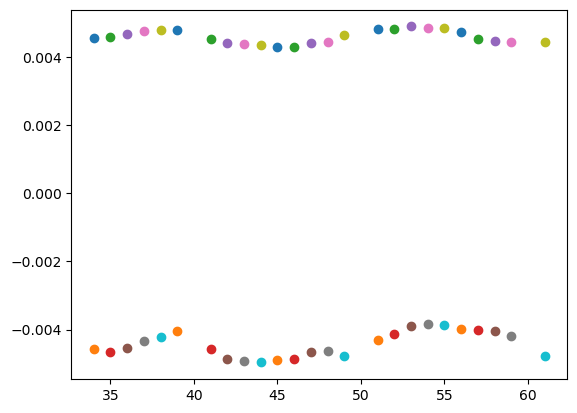

In [ ]:
error_func=0
fig,ax=plt.subplots()

for key in aia_simu.keys():
    if key in eve_obs.keys():
        error_func+=(aia_simu[key]-eve_obs[key])**2
        ax.scatter(key,aia_simu[key])
        ax.scatter(key,eve_obs[key])        

In [ ]:
def f(a):
    print(a)

In [ ]:
error = 0
for key in aia_simu.keys():
    if key in eve_obs.keys():
        error += (aia_simu[key]-eve_obs[key])**2
error

0.0019163293763551457

# Gradient Descent Visualization

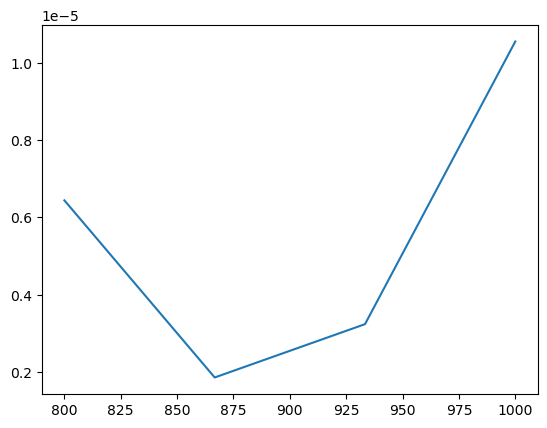

In [ ]:
# Fix values of b and c
b = 0.91
c = -9e-03

# Define values of a to evaluate
a_vals = np.linspace(800, 1000, 4)

# Evaluate function at each value of a
f_vals = [error_function((a, b, c)) for a in a_vals]

# Plot the results
fig,ax=plt.subplots()
ax.plot(a_vals,f_vals)

## Time before cupy added in

In [9]:
def func_evaluation():
    error_function([ 9e+02,0,0,  9e-01, -9e-03])
    

start=time.time()
func_evaluation()    
end=time.time()
end-start

241.6275029182434

### process one image

In [6]:
aia_adjusted_files = sorted(glob.glob('data/AIA/*adjusted.fits'))
aia_adjusted_maps = sunpy.map.Map(aia_adjusted_files)

In [29]:
start=time.time()
calculate_DN_4096(aia_adjusted_maps[0],)
end=time.time()
end-start

6.905684471130371

## Time using cupy


In [3]:
aia_adjusted_files = sorted(glob.glob('data/AIA/*adjusted.fits'))
aia_adjusted_maps = sunpy.map.Map(aia_adjusted_files)

In [8]:
start=time.time()
for i in range(28):
  calculate_DN_4096(aia_adjusted_maps[0],i*100,0,0,0.9,0)

end=time.time()
end-start

one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image
one image


10.977870225906372

In [5]:
def func_evaluation():
    error_function([ 9e+02,0,0,  9e-01, -9e-03])
    

start=time.time()
func_evaluation()    
end=time.time()
end-start

16.821963787078857